In [1]:
import pandas as pd
from datetime import datetime
import re

## DIE ZEIT

In [2]:
zeit_df=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/zeit_corona.csv")
zeit_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [3]:
zeit_df2=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/zeit_astrazeneca.csv")
zeit_df2.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
zeit_df3=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/zeit_biontech.csv")
zeit_df3.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
zeit_df4=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/zeit_curevac.csv")
zeit_df4.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
zeit_df5=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/zeit_johnson.csv")
zeit_df5.drop(["Unnamed: 0"], axis=1, inplace=True)

In [7]:
zeit_df6=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/zeit_moderna.csv")
zeit_df6.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
zeit=pd.concat([zeit_df,zeit_df2,zeit_df3,zeit_df4,zeit_df5,zeit_df6],axis=0)
zeit.reset_index(drop=True, inplace=True)
zeit

,title,release_date,snippet,teaser_text,teaser_title,href
0,Noch 'ne Runde!,2020-03-21T19:29:55Z,tatsächlich auch für Erwachsene nicht langwei...,Spätestens nach einem Tag Homeoffice und Homes...,Noch 'ne Runde!,http://www.zeit.de/kultur/2020-03/gesellschaft...
1,Gewinnen ist was für Verlierer?,2020-03-21T19:28:56Z,"mir schweigend Möglichkeiten aus, ein bessere...",Klar ist: Wir sollen zu Hause bleiben. Dort ha...,Gewinnen ist was für Verlierer?,http://www.zeit.de/kultur/2020-03/corona-quara...
2,Corona und der Staat,2020-03-21T19:24:03Z,dennoch nicht allzu vorsichtig sein. Denn wer...,Die Regierenden testen in der Coronakrise gese...,Corona und der Staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...
3,"""Kleine Änderungen im Alltag können viel bewir...",2020-03-21T19:08:31Z,provisorischen <em>Corona</em>-Krankenhäusern...,"Du Mingjun lebt in Wuhan, dem Ursprungsort der...","""Kleine Änderungen im Alltag können viel bewir...",http://www.zeit.de/gesellschaft/zeitgeschehen/...
4,"""Eigentlich wäre ich jetzt gerne bei meiner Fa...",2020-03-21T18:07:50Z,"Eigentlich wollten sie den Sommer in Italien, ...","Ausgangssperren, die Unis sind zu, die Flüge g...","""Eigentlich wäre ich jetzt gerne bei meiner Fa...",http://www.zeit.de/campus/2020-03/auslandsseme...
...,...,...,...,...,...,...
10174,Jetzt sind wir dran!,2021-03-17T16:01:50Z,Fernsehbilder aus Europa und den USA. Auf die...,In vielen ärmeren Ländern haben die Impfungen ...,Jetzt sind wir dran!,http://www.zeit.de/2021/12/globale-impfstoffve...
10175,Impfgipfel von Bund und Ländern auf Freitag ve...,2021-03-16T10:45:04Z,"zugelassenen Mittel von BioNTech/Pfizer, <em>...","Wie geht es weiter mit AstraZeneca, wann impfe...",Impfgipfel von Bund und Ländern auf Freitag ve...,http://www.zeit.de/politik/deutschland/2021-03...
10176,"""Manche behaupteten, sie hätten ein Attest geg...",2021-03-15T13:36:29Z,?\nKlages: Erst seit etwa zwei Wochen. Wir ver...,"Liam Klages, 20, leitet ein Impfzentrum. Im Ge...","""Manche behaupteten, sie hätten ein Attest geg...",http://www.zeit.de/arbeit/2021-03/astrazeneca-...
10177,Russischer Corona-Impfstoff soll in Deutschlan...,2021-03-15T11:16:34Z,. Bei den bisher von der Ema zugelassenen Coro...,Russland hat nach eigenen Angaben Abkommen mit...,Russischer Corona-Impfstoff soll in Deutschlan...,http://www.zeit.de/wissen/2021-03/sputnik-v-ru...


In [9]:
def data_clean(x):
    x=str(x)
    return x[:10]

In [10]:
zeit["release_date"]=zeit["release_date"].apply(lambda x: data_clean(x))

In [11]:
zeit["snippet"]=zeit["snippet"].apply(lambda x: re.sub("<em>", "", x))
zeit["snippet"]=zeit["snippet"].apply(lambda x: re.sub("</em>", "", x))
zeit["snippet"]=zeit["snippet"].apply(lambda x: re.sub("\n", " ", x))

In [12]:
zeit["original_headline"]=zeit["title"]+zeit["snippet"]+" "+zeit["teaser_text"]

In [13]:
zeit["original_headline"][0]

"Noch 'ne Runde! tatsächlich auch für Erwachsene nicht langweilig. (Für 2 bis 7 Spieler, ab 4 Jahren)Simone Gaul Eine Krise braucht Bilder, muss begreifbar werden durch Metaphern. Die derzeitige Corona-Krise sickert nur Spätestens nach einem Tag Homeoffice und Homeschooling haben sich alle eine Partie Spaß verdient. Die Gesellschaftsspiele-Tipps der ZEIT ONLINE-Redaktion"

In [14]:
#zeit["teaser_text"]=zeit["teaser_text"].apply(lambda x: re.sub("<em>", "", x))
#zeit["teaser_text"]=zeit["teaser_text"].apply(lambda x: re.sub("</em>", "", x))
#zeit["teaser_text"]=zeit["teaser_text"].apply(lambda x: re.sub("\n", "", x))

In [15]:
import re
import string

def cleaning_punctuation(x):
    x=str(x)
    x=x.lower()
    remove = string.punctuation
    remove = remove.replace("-", "")
    remove = remove.replace("/", "")
    remove = remove.replace("&", "")# don't remove hyphens
    pattern = r"[{}]".format(remove)
    x=re.sub(pattern, "", x)
    return x

In [16]:
zeit["title"]=zeit["title"].apply(lambda x: cleaning_punctuation(x))
zeit["snippet"]=zeit["snippet"].apply(lambda x: cleaning_punctuation(x))
zeit["teaser_text"]=zeit["teaser_text"].apply(lambda x: cleaning_punctuation(x))
zeit["teaser_title"]=zeit["teaser_title"].apply(lambda x: cleaning_punctuation(x))

In [17]:
zeit.drop_duplicates(inplace=True)

#### Removing stopwords

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carolinvogt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
german_stop_words = stopwords.words('german')
vect = CountVectorizer(stop_words = german_stop_words)

In [20]:
zeit_copy=zeit

In [21]:
def stop_word_removal(x):
    token = x.split()
    return ' '.join([w for w in token if not w in german_stop_words])

In [22]:
cols=['title',
 'snippet',
 'teaser_text',
 'teaser_title']
cols

['title', 'snippet', 'teaser_text', 'teaser_title']

In [23]:
for col in cols:
    zeit_copy[col]=zeit_copy[col].apply(lambda x: stop_word_removal(x))
    
zeit_copy

,title,release_date,snippet,teaser_text,teaser_title,href,original_headline
0,ne runde,2020-03-21,tatsächlich erwachsene langweilig 2 7 spieler ...,spätestens tag homeoffice homeschooling partie...,ne runde,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...
1,gewinnen verlierer,2020-03-21,schweigend möglichkeiten besserer mensch okay ...,klar sollen hause bleiben zeit gesellschaftssp...,gewinnen verlierer,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...
2,corona staat,2020-03-21,dennoch allzu vorsichtig wer rechtzeitig hande...,regierenden testen coronakrise gesetzliche gre...,corona staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...
3,kleine änderungen alltag bewirken,2020-03-21,provisorischen corona-krankenhäusern quarantän...,mingjun lebt wuhan ursprungsort coronavirus-pa...,kleine änderungen alltag bewirken,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir..."
4,eigentlich wäre gerne familie,2020-03-21,eigentlich wollten sommer italien spanien slow...,ausgangssperren unis flüge gestrichen corona-k...,eigentlich wäre gerne familie,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa..."
...,...,...,...,...,...,...,...
10157,trotz astrazeneca-impfstaus lehnt bundesregier...,2021-03-01,astrazeneca öffentlich impfen lassen sollten w...,ende woche sollen mehr million dosen vakzine a...,trotz astrazeneca-impfstaus lehnt bundesregier...,http://www.zeit.de/politik/deutschland/2021-03...,Trotz AstraZeneca-Impfstaus lehnt Bundesregier...
10159,thüringen stoppt vergabe impfterminen,2021-03-13,gesundheitsministeriums erfurt sollten dafür k...,astrazeneca liefert erneut weniger impfstoff z...,thüringen stoppt vergabe impfterminen,http://www.zeit.de/wissen/gesundheit/2021-03/c...,Thüringen stoppt Vergabe von Impfterminen Gesu...
10160,große impfversprechen,2021-03-12,skizziert möglichen ablauf praxen bestellen je...,ab april 700000 impfungen pro tag kanzlerin zu...,große impfversprechen,http://www.zeit.de/politik/2021-03/corona-impf...,Das große Impfversprechen skizziert einen mögl...
10165,jens spahn lässt abweichungen impfpriorisierung,2021-03-10,moderna abstand zweitimpfung sechs wochen ausg...,altersbeschränkung mehr astrazeneca größerer a...,jens spahn lässt abweichungen impfpriorisierung,http://www.zeit.de/wissen/gesundheit/2021-03/j...,Jens Spahn lässt Abweichungen von Impfpriorisi...


In [24]:
#!python -m spacy download de_core_news_sm

import spacy

nlp = spacy.load('de_core_news_sm')

In [25]:
def lemmatizer(x):
    token = nlp(x)
    #x.lemma_
    return ' '.join([t.lemma_ for t in token])

In [26]:
cols=['title',
 'snippet',
 'teaser_text',
 'teaser_title']

In [27]:
for col in cols:
    zeit_copy[col]=zeit_copy[col].apply(lambda x: lemmatizer(x))

In [28]:
zeit_copy

,title,release_date,snippet,teaser_text,teaser_title,href,original_headline
0,ne runden,2020-03-21,tatsächlich erwachsen langweilig 2 7 spieler a...,spätestens tag homeoffice homeschooling partie...,ne runden,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...
1,gewinnen verlierer,2020-03-21,schweigen möglichkeiten gut mensch okay vielle...,klaren sollen hause bleiben zeit gesellschafts...,gewinnen verlierer,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...
2,corona staat,2020-03-21,dennoch allzu vorsichtig wer rechtzeitig hande...,regierend testen coronakrise gesetzliche grenz...,corona staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...
3,kleine änderungen alltag bewirken,2020-03-21,provisorisch corona-krankenhäusern quarantäne-...,mingjun leben wuhan ursprungsort coronavirus-p...,kleine änderungen alltag bewirken,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir..."
4,eigentlich sein gerne familie,2020-03-21,eigentlich wollen sommer italien spanien slowe...,ausgangssperren unis flüge streichen corona-kr...,eigentlich sein gerne familie,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa..."
...,...,...,...,...,...,...,...
10157,trotzen astrazeneca-impfstaus lehnen bundesreg...,2021-03-01,astrazeneca öffentlich impfen lassen sollen wi...,ende woche sollen mehr million dosen vakzine a...,trotzen astrazeneca-impfstaus lehnen bundesreg...,http://www.zeit.de/politik/deutschland/2021-03...,Trotz AstraZeneca-Impfstaus lehnt Bundesregier...
10159,thüringen stoppen vergabe impfterminen,2021-03-13,gesundheitsministeriums erfurt sollen dafür kn...,astrazeneca liefern erneut wenig impfstoff zei...,thüringen stoppen vergabe impfterminen,http://www.zeit.de/wissen/gesundheit/2021-03/c...,Thüringen stoppt Vergabe von Impfterminen Gesu...
10160,groß impfversprechen,2021-03-12,skizzieren möglich ablauf praxen bestellen jew...,ab april 700000 impfungen pro tag kanzlerin zu...,groß impfversprechen,http://www.zeit.de/politik/2021-03/corona-impf...,Das große Impfversprechen skizziert einen mögl...
10165,jens spahn lässt abweichungen impfpriorisierung,2021-03-10,moderna abstand zweitimpfung sechs wochen auss...,altersbeschränkung mehr astrazeneca groß absta...,jens spahn lässt abweichungen impfpriorisierung,http://www.zeit.de/wissen/gesundheit/2021-03/j...,Jens Spahn lässt Abweichungen von Impfpriorisi...


In [29]:
zeit_copy["teaser_title"][0]

'ne runden'

In [30]:
zeit_copy["snippet"][0]

'tatsächlich erwachsen langweilig 2 7 spieler ab 4 jahrensimone gaul krise brauchen bilder begreifbar metaphern derzeitig corona-krise sickert'

In [31]:
zeit_covid=zeit_copy

In [32]:
zeit_covid["release_date"]=zeit_covid["release_date"].apply(lambda x: re.sub(' ', "", x))

In [33]:
zeit_covid["newspaper"]=zeit_covid["teaser_title"].apply(lambda x: "Die Zeit")

In [34]:
zeit_covid["headline"]=zeit_covid["title"]+" "+zeit_covid["snippet"]+" "+zeit_covid["teaser_text"]

In [35]:
zeit_covid

,title,release_date,snippet,teaser_text,teaser_title,href,original_headline,newspaper,headline
0,ne runden,2020-03-21,tatsächlich erwachsen langweilig 2 7 spieler a...,spätestens tag homeoffice homeschooling partie...,ne runden,http://www.zeit.de/kultur/2020-03/gesellschaft...,Noch 'ne Runde! tatsächlich auch für Erwachsen...,Die Zeit,ne runden tatsächlich erwachsen langweilig 2 7...
1,gewinnen verlierer,2020-03-21,schweigen möglichkeiten gut mensch okay vielle...,klaren sollen hause bleiben zeit gesellschafts...,gewinnen verlierer,http://www.zeit.de/kultur/2020-03/corona-quara...,Gewinnen ist was für Verlierer? mir schweigend...,Die Zeit,gewinnen verlierer schweigen möglichkeiten gut...
2,corona staat,2020-03-21,dennoch allzu vorsichtig wer rechtzeitig hande...,regierend testen coronakrise gesetzliche grenz...,corona staat,http://www.zeit.de/kultur/2020-03/staat-ausnah...,Corona und der Staat dennoch nicht allzu vorsi...,Die Zeit,corona staat dennoch allzu vorsichtig wer rech...
3,kleine änderungen alltag bewirken,2020-03-21,provisorisch corona-krankenhäusern quarantäne-...,mingjun leben wuhan ursprungsort coronavirus-p...,kleine änderungen alltag bewirken,http://www.zeit.de/gesellschaft/zeitgeschehen/...,"""Kleine Änderungen im Alltag können viel bewir...",Die Zeit,kleine änderungen alltag bewirken provisorisch...
4,eigentlich sein gerne familie,2020-03-21,eigentlich wollen sommer italien spanien slowe...,ausgangssperren unis flüge streichen corona-kr...,eigentlich sein gerne familie,http://www.zeit.de/campus/2020-03/auslandsseme...,"""Eigentlich wäre ich jetzt gerne bei meiner Fa...",Die Zeit,eigentlich sein gerne familie eigentlich wolle...
...,...,...,...,...,...,...,...,...,...
10157,trotzen astrazeneca-impfstaus lehnen bundesreg...,2021-03-01,astrazeneca öffentlich impfen lassen sollen wi...,ende woche sollen mehr million dosen vakzine a...,trotzen astrazeneca-impfstaus lehnen bundesreg...,http://www.zeit.de/politik/deutschland/2021-03...,Trotz AstraZeneca-Impfstaus lehnt Bundesregier...,Die Zeit,trotzen astrazeneca-impfstaus lehnen bundesreg...
10159,thüringen stoppen vergabe impfterminen,2021-03-13,gesundheitsministeriums erfurt sollen dafür kn...,astrazeneca liefern erneut wenig impfstoff zei...,thüringen stoppen vergabe impfterminen,http://www.zeit.de/wissen/gesundheit/2021-03/c...,Thüringen stoppt Vergabe von Impfterminen Gesu...,Die Zeit,thüringen stoppen vergabe impfterminen gesundh...
10160,groß impfversprechen,2021-03-12,skizzieren möglich ablauf praxen bestellen jew...,ab april 700000 impfungen pro tag kanzlerin zu...,groß impfversprechen,http://www.zeit.de/politik/2021-03/corona-impf...,Das große Impfversprechen skizziert einen mögl...,Die Zeit,groß impfversprechen skizzieren möglich ablauf...
10165,jens spahn lässt abweichungen impfpriorisierung,2021-03-10,moderna abstand zweitimpfung sechs wochen auss...,altersbeschränkung mehr astrazeneca groß absta...,jens spahn lässt abweichungen impfpriorisierung,http://www.zeit.de/wissen/gesundheit/2021-03/j...,Jens Spahn lässt Abweichungen von Impfpriorisi...,Die Zeit,jens spahn lässt abweichungen impfpriorisierun...


In [36]:
rename_zeit_temp={'href':"url", 'headline':"headline2"}


In [37]:
zeit_covid_temp=zeit_covid.rename(columns=rename_zeit_temp)
zeit_covid_temp=zeit_covid_temp[["url","headline2"]]
zeit_covid_temp

,url,headline2
0,http://www.zeit.de/kultur/2020-03/gesellschaft...,ne runden tatsächlich erwachsen langweilig 2 7...
1,http://www.zeit.de/kultur/2020-03/corona-quara...,gewinnen verlierer schweigen möglichkeiten gut...
2,http://www.zeit.de/kultur/2020-03/staat-ausnah...,corona staat dennoch allzu vorsichtig wer rech...
3,http://www.zeit.de/gesellschaft/zeitgeschehen/...,kleine änderungen alltag bewirken provisorisch...
4,http://www.zeit.de/campus/2020-03/auslandsseme...,eigentlich sein gerne familie eigentlich wolle...
...,...,...
10157,http://www.zeit.de/politik/deutschland/2021-03...,trotzen astrazeneca-impfstaus lehnen bundesreg...
10159,http://www.zeit.de/wissen/gesundheit/2021-03/c...,thüringen stoppen vergabe impfterminen gesundh...
10160,http://www.zeit.de/politik/2021-03/corona-impf...,groß impfversprechen skizzieren möglich ablauf...
10165,http://www.zeit.de/wissen/gesundheit/2021-03/j...,jens spahn lässt abweichungen impfpriorisierun...


In [38]:
#zeit_covid_temp.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/zeit_covid_temp.csv")

print("Sucessfully saved")

Sucessfully saved


In [39]:
zeit_covid["headline"][0]

'ne runden tatsächlich erwachsen langweilig 2 7 spieler ab 4 jahrensimone gaul krise brauchen bilder begreifbar metaphern derzeitig corona-krise sickert spätestens tag homeoffice homeschooling partie spaß verdienen gesellschaftsspiele-tipps zeit online-redaktion'

#### cleaning href 

In [40]:
def hrefs_ids(href):
    first_part = href.split("http://www.zeit.de/")
    id_tag = first_part[1].split('/')
    return id_tag[0]

In [41]:
zeit_covid["channel"]=zeit_covid["href"].apply(lambda x: hrefs_ids(x))

In [42]:
zeit_covid["channel"].value_counts()

politik         3090
wissen          1181
2020            1129
gesellschaft     992
wirtschaft       835
kultur           458
hamburg          457
2021             342
sport            333
arbeit           280
zeit-magazin     184
mobilitaet       183
digital          168
campus           137
entdecken        104
wq                29
zett              17
2020-07            3
2020-06            3
2021-01            2
2020-10            2
2020-12            2
2020-08            2
2020-09            2
2020-11            1
2021-03            1
news               1
die-antwort        1
2021-02            1
z2x                1
embed              1
Name: channel, dtype: int64

In [43]:
to_drop=["sport", "wq"]
print("Before deleting channels: ", zeit_covid.shape)
zeit_covid = zeit_copy[~zeit_covid['channel'].isin(to_drop)]
print("After deleting channels: ", zeit_covid.shape)

Before deleting channels:  (9942, 10)
After deleting channels:  (9580, 10)


In [44]:
counts=zeit_covid["channel"].value_counts()
print("Before deleting channels: ", zeit_covid.shape)
zeit_covid = zeit_covid[~zeit_covid['channel'].isin(counts[counts < 2].index)]
print("After deleting channels: ", zeit_covid.shape)

Before deleting channels:  (9580, 10)
After deleting channels:  (9573, 10)


In [48]:
from matplotlib import pyplot as plt
import seaborn as sns

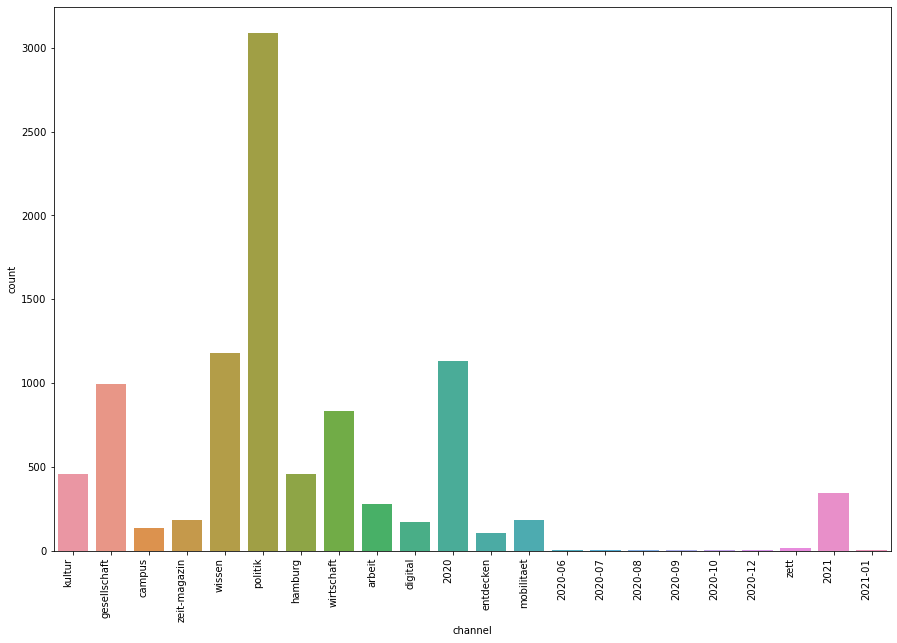

In [49]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="channel", data=zeit_covid)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [51]:
news_dict = {}

for i in list(zeit_covid.index):
    #cleaning words_list for every index
    words_list=[]
    words_list+=zeit_covid["headline"][i].split(' ')
    words_set=set(words_list)
    for x in words_list:
        if x not in news_dict:
            news_dict[x] = 1
        else:
            news_dict[x] += 1

In [52]:
sort_zeit = sorted(news_dict.items(), key=lambda x: x[1], reverse=True)
sort_zeit

[('corona', 2471),
 ('corona-krise', 2445),
 ('–', 2287),
 ('mehr', 1935),
 ('corona-pandemie', 1799),
 ('menschen', 1574),
 ('viel', 1508),
 ('werden', 1496),
 ('deutschland', 1481),
 ('sagen', 1273),
 ('wegen', 1271),
 ('geben', 1220),
 ('sein', 1204),
 ('gehen', 1133),
 ('gut', 1083),
 ('seit', 1034),
 ('kommen', 993),
 ('sollen', 925),
 ('groß', 907),
 ('neue', 897),
 ('deutsch', 883),
 ('neu', 868),
 ('erst', 847),
 ('pandemie', 835),
 ('wenig', 798),
 ('zeit', 767),
 ('schon', 723),
 ('weit', 647),
 ('machen', 621),
 ('jahr', 621),
 ('zeigen', 601),
 ('stehen', 600),
 ('millionen', 600),
 ('dürfen', 598),
 ('müssen', 590),
 ('bleiben', 584),
 ('ab', 583),
 ('usa', 579),
 ('trump', 568),
 ('eu', 564),
 ('wer', 554),
 ('immer', 553),
 ('prozent', 547),
 ('laut', 545),
 ('fordern', 543),
 ('euro', 542),
 ('sehen', 528),
 ('zahl', 527),
 ('hoch', 522),
 ('krise', 515),
 ('steigen', 515),
 ('warum', 503),
 ('zwei', 493),
 ('leben', 492),
 ('impfstoff', 490),
 ('biontech', 487),
 ('fra

In [53]:
keywords_zeit=pd.DataFrame()

keywords_zeit["keyword"]=[sort_zeit[i][0] for i in range(len(sort_zeit))]
keywords_zeit["count"]=[sort_zeit[i][1] for i in range(len(sort_zeit))]

keywords_zeit=keywords_zeit[keywords_zeit["count"]>25]

In [54]:
print(len(sort_zeit))
print(len(keywords_zeit["keyword"]))

40417
1811


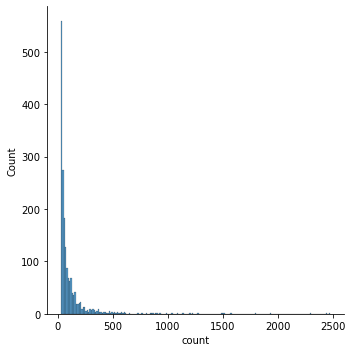

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(keywords_zeit["count"])
plt.show()

In [56]:
dic_corona=sort_zeit[:1615]

In [57]:
dic_corona=dic_corona[1:]
dic_corona

[('corona-krise', 2445),
 ('–', 2287),
 ('mehr', 1935),
 ('corona-pandemie', 1799),
 ('menschen', 1574),
 ('viel', 1508),
 ('werden', 1496),
 ('deutschland', 1481),
 ('sagen', 1273),
 ('wegen', 1271),
 ('geben', 1220),
 ('sein', 1204),
 ('gehen', 1133),
 ('gut', 1083),
 ('seit', 1034),
 ('kommen', 993),
 ('sollen', 925),
 ('groß', 907),
 ('neue', 897),
 ('deutsch', 883),
 ('neu', 868),
 ('erst', 847),
 ('pandemie', 835),
 ('wenig', 798),
 ('zeit', 767),
 ('schon', 723),
 ('weit', 647),
 ('machen', 621),
 ('jahr', 621),
 ('zeigen', 601),
 ('stehen', 600),
 ('millionen', 600),
 ('dürfen', 598),
 ('müssen', 590),
 ('bleiben', 584),
 ('ab', 583),
 ('usa', 579),
 ('trump', 568),
 ('eu', 564),
 ('wer', 554),
 ('immer', 553),
 ('prozent', 547),
 ('laut', 545),
 ('fordern', 543),
 ('euro', 542),
 ('sehen', 528),
 ('zahl', 527),
 ('hoch', 522),
 ('krise', 515),
 ('steigen', 515),
 ('warum', 503),
 ('zwei', 493),
 ('leben', 492),
 ('impfstoff', 490),
 ('biontech', 487),
 ('fragen', 476),
 ('land

# SPIEGEL

In [59]:
spiegel_df=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/spiegel.csv")
spiegel_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [60]:
spiegel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41528 entries, 0 to 41527
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             41528 non-null  object
 1   headline        41528 non-null  object
 2   is_paid         41528 non-null  bool  
 3   date_published  41527 non-null  object
 4   channel         41527 non-null  object
dtypes: bool(1), object(4)
memory usage: 1.3+ MB


In [61]:
spiegel_df

,url,headline,is_paid,date_published,channel
0,https://www.spiegel.de/panorama/chile-raeuber-...,Chile: Räuber erbeuten 15 Millionen Dollar in bar,False,2020-03-09 23:28:00,Panorama
1,https://www.spiegel.de/sport/coronavirus-serie...,Coronavirus: Italien sagt alle Sportveranstalt...,False,2020-03-09 23:21:00,Sport
2,https://www.spiegel.de/panorama/justiz/harvey-...,Nach Herz-OP: Weinstein verletzt sich bei Stur...,False,2020-03-09 22:54:00,Panorama
3,https://www.spiegel.de/sport/fussball/arminia-...,Topspiel der 2. Bundesliga: Bielefeld wehrt de...,False,2020-03-09 22:26:00,Sport
4,https://www.spiegel.de/panorama/italien-weitet...,"Coronavirus: Italien weitet ""rote Zone"" auf da...",False,2020-03-09 21:57:00,Panorama
...,...,...,...,...,...
41523,https://www.spiegel.de/wirtschaft/norwegischer...,Chef des Norwegischen Staatsfonds: Was Sie vom...,False,2021-03-24 00:43:00,Wirtschaft
41524,https://www.spiegel.de/reise/luxustourismus-tr...,Luxustourismus trotz Corona: Der Tegernsee wir...,False,2021-03-24 00:43:00,Reise
41525,https://www.spiegel.de/netzwelt/web/twitter-er...,24 Zeichen: Erster Tweet der Welt bringt bei A...,False,2021-03-24 00:43:00,Netzwelt
41526,https://www.spiegel.de/netzwelt/web/digitale-k...,Digitale Kopie: GMX und Web.de verraten jetzt ...,False,2021-03-24 00:39:00,Netzwelt


## SPIEGEL: Cleaning DataFrame

#### 1. clean date

In [62]:
def data_clean(x):
    x=str(x)
    return x[:10]

In [63]:
spiegel_df["date_published"]=spiegel_df["date_published"].apply(lambda x: data_clean(x))

In [64]:
spiegel_df["date_published"][0]

'2020-03-09'

In [65]:
spiegel_df["headline"]=spiegel_df["headline"].apply(lambda x: cleaning_punctuation(x))

In [66]:
spiegel_df["original_headline"]=spiegel_df["headline"]

In [67]:
spiegel_df["headline"]=spiegel_df["headline"].apply(lambda x: stop_word_removal(x))

In [68]:
spiegel_df["headline"]=spiegel_df["headline"].apply(lambda x: lemmatizer(x))

In [69]:
spiegel_df

,url,headline,is_paid,date_published,channel,original_headline
0,https://www.spiegel.de/panorama/chile-raeuber-...,chile räuber erbeuten 15 millionen dollar bar,False,2020-03-09,Panorama,chile räuber erbeuten 15 millionen dollar in bar
1,https://www.spiegel.de/sport/coronavirus-serie...,coronavirus italien sagen sportveranstaltungen...,False,2020-03-09,Sport,coronavirus italien sagt alle sportveranstaltu...
2,https://www.spiegel.de/panorama/justiz/harvey-...,herz-op weinstein verletzen sturz gefängnis,False,2020-03-09,Panorama,nach herz-op weinstein verletzt sich bei sturz...
3,https://www.spiegel.de/sport/fussball/arminia-...,topspiel 2 bundesliga bielefeld wehren stuttga...,False,2020-03-09,Sport,topspiel der 2 bundesliga bielefeld wehrt den ...
4,https://www.spiegel.de/panorama/italien-weitet...,coronavirus italien weiten rote zone ganze land,False,2020-03-09,Panorama,coronavirus italien weitet rote zone auf das g...
...,...,...,...,...,...,...
41523,https://www.spiegel.de/wirtschaft/norwegischer...,chef norwegisch staatsfonds 1000-milliarden-eu...,False,2021-03-24,Wirtschaft,chef des norwegischen staatsfonds was sie vom ...
41524,https://www.spiegel.de/reise/luxustourismus-tr...,luxustourismus trotzen corona tegernsee neue sylt,False,2021-03-24,Reise,luxustourismus trotz corona der tegernsee wird...
41525,https://www.spiegel.de/netzwelt/web/twitter-er...,24 zeichen erst tweet welt bringen auktion fas...,False,2021-03-24,Netzwelt,24 zeichen erster tweet der welt bringt bei au...
41526,https://www.spiegel.de/netzwelt/web/digitale-k...,digitale kopie gmx webde verraten vorab online...,False,2021-03-24,Netzwelt,digitale kopie gmx und webde verraten jetzt vo...


In [70]:
spiegel_df["headline"][0]

'chile räuber erbeuten 15 millionen dollar bar'

In [71]:
spiegel_df["original_headline"][0]

'chile räuber erbeuten 15 millionen dollar in bar'

#### 2. reduce to corona related news

In [72]:
#corona_list=["corona","rki","drosten","wieler","merkel","spahn","coronavirus","virus","lockdown","pandemie","epidemie","pcr-test","impfzentren","hausärzte","schnelltest","teststrategie","intensivbetten","covid","covid-19","impfung","impfstrategie","impfen","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]



In [73]:
#corona_list=["corona","rki","drosten","wieler","merkel","spahn","coronavirus","virus","lockdown","pandemie","epidemie","pcr-test","impfzentren","hausärzte","schnelltest","teststrategie","intensivbetten","covid","covid-19","impfung","impfstrategie","impfen","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]



def corona_related(x):
    temp_list=x.split(' ')

    score=0
    
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        
        elif word in list(keywords_zeit["keyword"]):
            score+=1
            #print(score)
        else:
            continue
            
    return score/(len(temp_list))

In [74]:
spiegel_df["corona_score"]=spiegel_df["headline"].apply(lambda x: corona_related(x))

NameError: name 'corona_list' is not defined

In [ ]:
spiegel_df[spiegel_df["corona_score"]>0.5]

In [ ]:
spiegel_df[spiegel_df["corona_score"]==1]

In [ ]:
sns.displot(spiegel_df["corona_score"],bins=100)
plt.show()

In [ ]:
index_corona=spiegel_df[spiegel_df["corona_score"]>0.5].index

In [ ]:
spiegel_covid=spiegel_df.iloc[index_corona]

In [ ]:
spiegel_covid

In [ ]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="channel", data=spiegel_covid)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
channel_dict={}

for unique in list(spiegel_covid["channel"].unique()):
    channel_dict[unique]=spiegel_covid[spiegel_covid["channel"]==unique]["channel"].count()

In [ ]:
channel_dict

In [ ]:
counts=spiegel_covid["channel"].value_counts()

In [ ]:
print("Before deleting channels: ", spiegel_covid.shape)
spiegel_covid = spiegel_covid[~spiegel_covid['channel'].isin(counts[counts < 50].index)]
print("After deleting channels: ", spiegel_covid.shape)

In [ ]:
print("Before deleting channels: ", spiegel_covid.shape)
spiegel_covid = spiegel_covid[~spiegel_covid['channel'].isin(["Sport"])]
print("After deleting channels: ", spiegel_covid.shape)

In [ ]:
spiegel_covid["headline"]=spiegel_covid["headline"].apply(lambda x: re.sub('»', "", x))
spiegel_covid["headline"]=spiegel_covid["headline"].apply(lambda x: re.sub('«', "", x))
spiegel_covid["headline"]=spiegel_covid["headline"].apply(lambda x: re.sub('–', "", x))
spiegel_covid["headline"]=spiegel_covid["headline"].apply(lambda x: re.sub('-', "", x))

In [ ]:
spiegel_covid["original_headline"]=spiegel_covid["original_headline"].apply(lambda x: re.sub('»', "", x))
spiegel_covid["original_headline"]=spiegel_covid["original_headline"].apply(lambda x: re.sub('«', "", x))
spiegel_covid["original_headline"]=spiegel_covid["original_headline"].apply(lambda x: re.sub('–', "", x))
spiegel_covid["original_headline"]=spiegel_covid["original_headline"].apply(lambda x: re.sub('-', "", x))

In [ ]:
spiegel_dict = {}

for i in list(spiegel_covid.index):
    #cleaning words_list for every index
    words_list=[]
    words_list+=spiegel_covid["headline"][i].split(' ')
    #words_set=set(words_list)
    for x in words_list:
        if x not in spiegel_dict:
            spiegel_dict[x] = 1
        else:
            spiegel_dict[x] += 1

In [ ]:
spiegel_sort=sorted(spiegel_dict.items(), key=lambda x: x[1], reverse=True)
spiegel_sort=spiegel_sort[1:len(spiegel_sort)]
spiegel_sort

In [ ]:
spiegel_covid["newspaper"]=spiegel_covid["corona_score"].apply(lambda x: "Der Spiegel")

# FRANKFURTER ALLGEMEINE

In [ ]:
FA_df=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/FA_part1.csv", index_col=0)
FA_df1=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/FA_part2.csv", index_col=0)
FA_df15=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/FA_part3.csv", index_col=0)
FA_df2=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/FA_biontech.csv", index_col=0)
FA_df3=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/FA_curevac.csv", index_col=0)
FA_df4=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/FA_johnson.csv", index_col=0)
FA_df5=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/FA_moderna.csv", index_col=0)
FA_df6=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_sentiment/german/FA_astrazeneca.csv", index_col=0)



In [ ]:
FA=pd.concat([FA_df,FA_df1,FA_df15,FA_df2,FA_df3,FA_df3,FA_df4,FA_df5,FA_df6],axis=0)
FA.reset_index(drop=True, inplace=True)

In [ ]:
print("with duplicates: ", FA.shape)
FA.drop_duplicates(inplace=True)
print("w/o duplicates: ", FA.shape)

In [ ]:
FA

#### Cleaning FA Dataframe

In [ ]:
def data_clean(x):
    x=str(x)
    return x[:10]

In [ ]:
FA["date_published"]=FA["date_published"].apply(lambda x: data_clean(x))

In [ ]:
FA=FA[FA["date_published"]>'2019-11-30']
#FA_copy=FA_copy[FA_copy["date_published"]>'2019-11-30']

In [ ]:
cols=["title","subtitle"]

In [ ]:
for col in cols:
    FA[col]=FA[col].apply(lambda x: re.sub("\t", "", x))
    FA[col]=FA[col].apply(lambda x: re.sub("\n", "", x))
    FA[col]=FA[col].apply(lambda x: re.sub('„', "", x))
    FA[col]=FA[col].apply(lambda x: re.sub('"', "", x))
    FA[col]=FA[col].apply(lambda x: re.sub('“', "", x))

In [ ]:
FA["original_headline"]=FA["title"]+FA["subtitle"]

In [ ]:
FA

In [ ]:
import re
import string

def cleaning_punctuation(x):
    x=str(x)
    x=x.lower()
    remove = string.punctuation
    remove = remove.replace("-", "")
    remove = remove.replace("/", "")
    remove = remove.replace("&", "")# don't remove hyphens
    pattern = r"[{}]".format(remove)
    x=re.sub(pattern, "", x)
    return x

In [ ]:
cols=["title", "subtitle"]

In [ ]:
for col in cols:
    FA[col]=FA[col].apply(lambda x: cleaning_punctuation(x))

In [ ]:
for col in cols:
    FA[col]=FA[col].apply(lambda x: stop_word_removal(x))
    FA[col]=FA[col].apply(lambda x: lemmatizer(x))

In [ ]:
FA["headline"]=FA["title"]+" "+FA["subtitle"]

In [ ]:
FA["headline"][0]

In [ ]:
corona_list=["schnelltest","teststrategie","intensivbetten","intensivstationen","impfung","impfstrategie","impfen","impflinge","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","astra-zeneca","oxford","janssen"]
#corona_list=[]


def corona_related(x):
    temp_list=x.split(' ')

    score=0
    
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        
        elif word in list(keywords_zeit["keyword"]):
            score+=1
            #print(score)
        else:
            continue
            
    return score/(len(temp_list))

In [ ]:
FA["corona_score"]=FA["headline"].apply(lambda x: corona_related(x))

In [ ]:
sns.displot(FA["corona_score"],bins=100)
plt.show()

In [ ]:
FA_covid=FA[FA["corona_score"]>0.49]

In [ ]:
FA_covid["newspaper"]=FA["corona_score"].apply(lambda x: "Frankfurter Allgemeine")

In [ ]:
FA_covid

### FRANKFRUTER ALLGEMEINE: Vaccine dictonary

In [ ]:
vaccine=["biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","astra-zeneca","oxford","janssen"]


def vaccine_mentioned(x):
    temp_list=x.split(' ')
    
    for word in temp_list:
        #print(word)
        if word in vaccine:
            return word

        else:
            return "n/a"       


In [ ]:
FA_covid["vaccine"]=FA_covid["headline"].apply(lambda x: vaccine_mentioned(x))

In [ ]:
FA_covid

In [ ]:
FA_covid["vaccine"].value_counts()

In [ ]:
FA["vaccine"]=FA["headline"].apply(lambda x: vaccine_mentioned(x))

In [ ]:
FA["vaccine"].value_counts()

### DIE ZEIT: Vaccine dictonary

In [ ]:
zeit_covid.columns

In [ ]:
zeit_covid["vaccine"]=zeit_covid["headline"].apply(lambda x: vaccine_mentioned(x))

In [ ]:
zeit_covid["vaccine"].value_counts()

### DER SPIEGEL: Vaccine dictonary

In [ ]:
spiegel_covid["vaccine"]=spiegel_covid["headline"].apply(lambda x: vaccine_mentioned(x))

In [ ]:
spiegel_covid["vaccine"].value_counts()

### Creating df_model

In [ ]:
zeit_covid.columns

In [ ]:
rename_zeit={'title':"title", 'release_date':"date_published", 'snippet':"snippet", 'teaser_text':"teaser_text", 'teaser_title':"teaser_title",
       'href':"url",'original_headline':'original_headline', 'channel':"channel", 'newspaper':"newspaper", 'headline':"headline", 'vaccine':"vaccine"}


In [ ]:
zeit_covid=zeit_covid.rename(columns=rename_zeit)
zeit_covid

In [ ]:
spiegel_covid.columns

In [ ]:
FA_covid

In [ ]:
test=pd.concat([zeit_covid,spiegel_covid,FA_covid], axis=0, ignore_index=False)
test.drop(["title","snippet","subtitle","teaser_text","teaser_title","is_paid","corona_score"],axis=1,inplace=True)
test

In [ ]:
test=test.reset_index(drop=True)
test

In [ ]:
order=['url', 'original_headline', 'headline', 'date_published', "channel" ,'newspaper',
       'vaccine']

In [ ]:
test=test[order]

In [ ]:
test

In [ ]:
test["vaccine"].value_counts()

In [ ]:
test.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/vaccine_confidence/df_model.csv")

print("Sucessfully saved")